In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("train.csv")

In [4]:
test = data.loc[data.date >= "2018-07-01"]

In [26]:
train = data.loc[data.date < "2018-07-01"]

In [27]:
train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
22981,22981,2018-06-30,Sweden,KaggleMart,Kaggle Hat,540
22982,22982,2018-06-30,Sweden,KaggleMart,Kaggle Sticker,161
22983,22983,2018-06-30,Sweden,KaggleRama,Kaggle Mug,416
22984,22984,2018-06-30,Sweden,KaggleRama,Kaggle Hat,942


In [28]:
# using univariate model means losing some info??
train.columns

Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [62]:
train_univ = train[["date", "num_sold"]]

In [63]:
train_univ

,date,num_sold
0,2015-01-01,329
1,2015-01-01,520
2,2015-01-01,146
3,2015-01-01,572
4,2015-01-01,911
...,...,...
22981,2018-06-30,540
22982,2018-06-30,161
22983,2018-06-30,416
22984,2018-06-30,942


In [65]:
%matplotlib inline

In [68]:
train_univ["num_sold"].describe()

count    22986.000000
mean       387.121639
std        267.618328
min         70.000000
25%        188.000000
50%        312.000000
75%        508.000000
max       2807.000000
Name: num_sold, dtype: float64

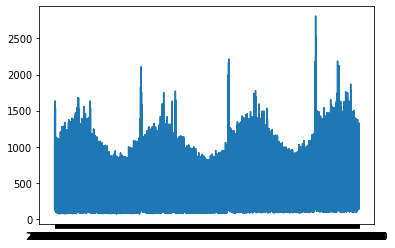

In [66]:
plt.figure()

plt.plot(train_univ["date"], train_univ["num_sold"])

plt.show()

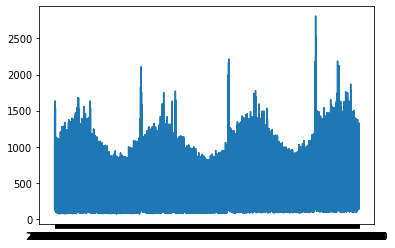

In [69]:
plt.figure()

plt.plot(data["date"], data["num_sold"])

plt.show()

In [12]:
test_real = pd.read_csv("test.csv")

In [13]:
test_real

,row_id,date,country,store,product


In [7]:
test.drop("num_sold", axis=1).set_index("row_id").to_csv("test.csv", index=True)

In [8]:
test

,row_id,date,country,store,product,num_sold


In [9]:
data.loc[data.date < "2018-07-01"].set_index("row_id").to_csv("train.csv", index=True)

In [10]:
test.loc[:, ["row_id", "num_sold"]].set_index("row_id").to_csv(
    "sample_submission.csv", index=True
)

In [11]:
test.num_sold = 100

## SARIMAX

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
# model parameters - EDIT!
p = 3
d = 0
q = 3

In [35]:
model = SARIMAX(np.asarray(train_univ), order=(p, d, q))

In [45]:
results = model.fit()
print(results.summary())

c:\Users\Maciek\__repos\timeseries\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Maciek\__repos\timeseries\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                22986
Model:               SARIMAX(3, 0, 3)   Log Likelihood             -149333.453
Date:                Sat, 22 Jan 2022   AIC                         298680.906
Time:                        12:28:51   BIC                         298737.204
Sample:                             0   HQIC                        298699.201
                              - 22986                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0399      0.003     13.458      0.000       0.034       0.046
ar.L2          0.1120      0.003     32.588      0.000       0.105       0.119
ar.L3          0.8481      0.004    203.687      0.0

In [70]:
p_range = [0, 1, 2, 3]
d_range = [0, 1, 2, 3]
q_range = [0, 1, 2, 3]

In [72]:
from itertools import chain, product

iter_range_wrong = list(chain(p_range, d_range, q_range))
print(iter_range_wrong)

iter_range = list(product(p_range, d_range, q_range))
print(iter_range)

[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 0), (3, 3, 1), (3, 3, 2), (3, 3, 3)]


In [74]:
for i in iter_range:
    print(f"iter: {i}")
    p, d, q = i
    print(p)
    print(d)
    print(q)

iter: (0, 0, 0)
0
0
0
iter: (0, 0, 1)
0
0
1
iter: (0, 0, 2)
0
0
2
iter: (0, 0, 3)
0
0
3
iter: (0, 1, 0)
0
1
0
iter: (0, 1, 1)
0
1
1
iter: (0, 1, 2)
0
1
2
iter: (0, 1, 3)
0
1
3
iter: (0, 2, 0)
0
2
0
iter: (0, 2, 1)
0
2
1
iter: (0, 2, 2)
0
2
2
iter: (0, 2, 3)
0
2
3
iter: (0, 3, 0)
0
3
0
iter: (0, 3, 1)
0
3
1
iter: (0, 3, 2)
0
3
2
iter: (0, 3, 3)
0
3
3
iter: (1, 0, 0)
1
0
0
iter: (1, 0, 1)
1
0
1
iter: (1, 0, 2)
1
0
2
iter: (1, 0, 3)
1
0
3
iter: (1, 1, 0)
1
1
0
iter: (1, 1, 1)
1
1
1
iter: (1, 1, 2)
1
1
2
iter: (1, 1, 3)
1
1
3
iter: (1, 2, 0)
1
2
0
iter: (1, 2, 1)
1
2
1
iter: (1, 2, 2)
1
2
2
iter: (1, 2, 3)
1
2
3
iter: (1, 3, 0)
1
3
0
iter: (1, 3, 1)
1
3
1
iter: (1, 3, 2)
1
3
2
iter: (1, 3, 3)
1
3
3
iter: (2, 0, 0)
2
0
0
iter: (2, 0, 1)
2
0
1
iter: (2, 0, 2)
2
0
2
iter: (2, 0, 3)
2
0
3
iter: (2, 1, 0)
2
1
0
iter: (2, 1, 1)
2
1
1
iter: (2, 1, 2)
2
1
2
iter: (2, 1, 3)
2
1
3
iter: (2, 2, 0)
2
2
0
iter: (2, 2, 1)
2
2
1
iter: (2, 2, 2)
2
2
2
iter: (2, 2, 3)
2
2
3
iter: (2, 3, 0)
2
3
0
iter: (2, 

In [78]:
train_sarimax = train_univ["num_sold"]
print(train_sarimax.shape)

(22986,)


In [86]:
import os

os.makedirs("./sarimax_models", exist_ok=False)

for i in iter_range:
    p, d, q = i
    model = SARIMAX(train_sarimax, order=(p, d, q))
    results = model.fit()
    with open(f"./sarimax_models/sarimax_{q}{d}{q}.txt", "w+") as f:
        f.write(str(results.summary()))

FileExistsError: [WinError 183] Nie można utworzyć pliku, który już istnieje: './sarimax_models'

In [39]:
forecast = results.get_prediction(start=-25)

In [40]:
forecast

In [46]:
# forecast mean
mean_forecast = forecast.predicted_mean

# get confidence intervals of forecast
confidence_intervals = forecast.conf_int()

In [60]:
mean_forecast_df = pd.DataFrame(data=mean_forecast)
mean_forecast_df
type(mean_forecast_df)

pandas.core.frame.DataFrame

In [49]:
dates = train[["date"]]

In [58]:
print(type(dates))
print(type(mean_forecast_df.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


KeyError: (slice(None, None, None), None)

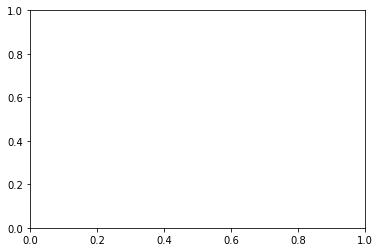

In [61]:
plt.figure()

# plot prediction
plt.plot(dates, mean_forecast_df.values, color="red", label="forecast")

# shade uncertainty area
# plt.fill_between(dates, lower_limits, upper_limits, color='pink')
plt.show()